In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Data visualization

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#what percentage of data is missing in the feature
round(df.isnull().sum(axis=0)/len(df),2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Data distribution
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
def plot_hist_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(df[df[column].notnull()][column],ax=ax1)
    sns.boxplot(y=df[df[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(df[df[column].notnull()][column]))
    print("kurtosis : ",kurtosis(df[df[column].notnull()][column]))
    plt.show()

skewness :  -0.6294858816096934
kurtosis :  -1.2795696818700388


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


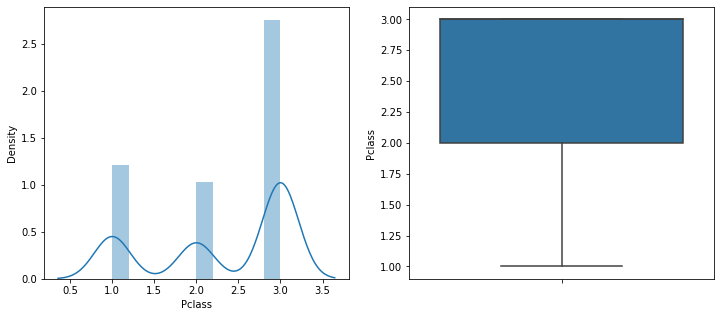

In [9]:
plot_hist_boxplot('Pclass')

skewness :  0.3882898514698657
kurtosis :  0.16863657224286044


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


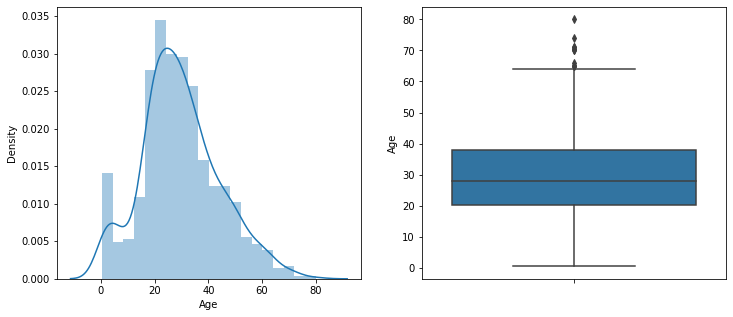

In [10]:
plot_hist_boxplot('Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
df['Age'].quantile([.5,0.75,0.90,.95,0.99,.999])

0.500    28.000
0.750    38.000
0.900    50.000
0.950    56.000
0.990    65.870
0.999    75.722
Name: Age, dtype: float64

In [13]:
df.loc[df['Age'] >65.87, 'Age'] = 65.87

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness :  3.6891276847759507
kurtosis :  17.77351174692092


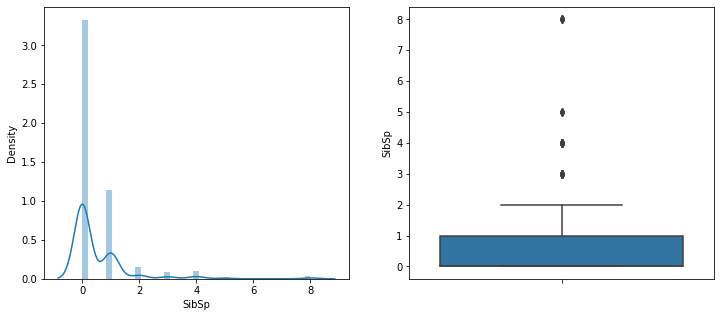

In [14]:
plot_hist_boxplot('SibSp')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness :  2.7444867379203735
kurtosis :  9.716613236667277


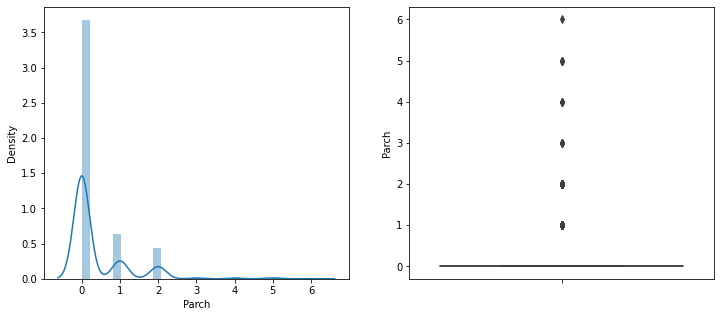

In [15]:
plot_hist_boxplot('Parch')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness :  4.7792532923723545
kurtosis :  33.20428925264474


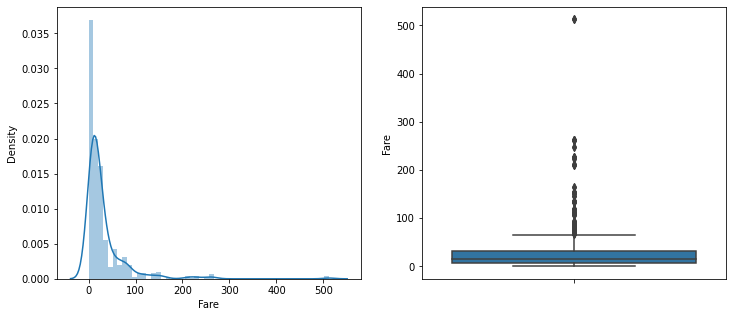

In [16]:
plot_hist_boxplot('Fare')

In [17]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
df['Fare'].quantile([.5,0.75,0.90,.95,0.99,.999])

0.500     14.45420
0.750     31.00000
0.900     77.95830
0.950    112.07915
0.990    249.00622
0.999    512.32920
Name: Fare, dtype: float64

In [19]:
df['Fare'].quantile([0.9995,.9999])

0.9995    512.3292
0.9999    512.3292
Name: Fare, dtype: float64

In [20]:
df.loc[df['Fare'] >249.00622, 'Fare'] = 249.00622

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

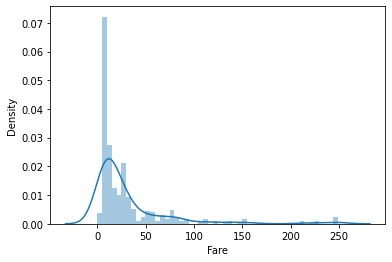

In [21]:
sns.distplot(df['Fare'])

In [22]:
# vectorize features
cat_cols = ['Sex','Embarked']

for c in cat_cols:
    df[c] = pd.factorize(df[c])[0]

In [23]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].fillna(0, inplace = True)

In [24]:
round(df.isnull().sum(axis=0)/len(df),2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


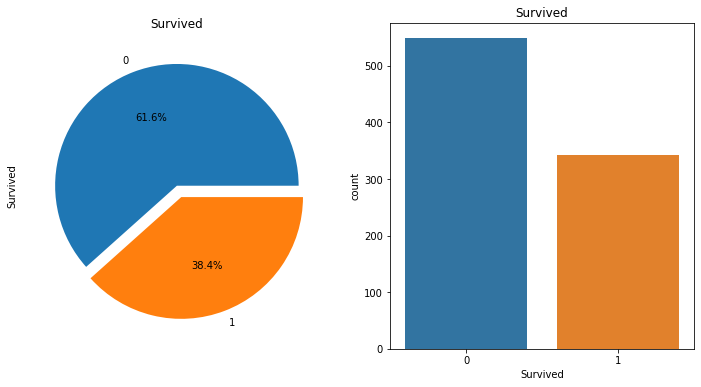

In [25]:
# Target
fig, axes = plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('Survived')
sns.countplot('Survived',data=df,ax=axes[1])
axes[1].set_title('Survived')
plt.show()

In [26]:
df2 = df.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1)
# split the data into features and targets
data = df2.drop(columns = ['Survived'], axis=1)
y = df2['Survived']


In [27]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [28]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into train and test validation
X_test, X_train, y_test, y_train = train_test_split(data, y, test_size = 0.8, random_state=42, stratify = y)
X_test.shape, X_train.shape

((178, 7), (713, 7))

In [29]:
#Scaling the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
import statistics
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier, PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib
from imblearn.over_sampling import SMOTE

In [31]:
def classify(est, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    est.fit(x, y)
    #Predicting the probabilities of the Tet data
    y2 = est.predict_proba(X_test)
    y1 = est.predict(X_test)

    print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))
    #Calculate different metrics
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(est, x, y))
    
    return est, y1, y2[:, 1]

#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

#Function to find which features are more important than others through model
def feat_importance(estimator):
    feature_importance = {}
    for index, name in enumerate(data.columns):
        feature_importance[name] = estimator.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)
    
    return sorted_x

In [32]:
#Finding accuracy and feature importance using XGB classifier
xgb, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train_scaled, y_train,X_test_scaled,y_test)
#print(xgb.feature_importances_)
#plot_importance(xgb)
#pyplot.show()
#feat1 = feat_importance(xgb)

Accuracy:  0.797752808988764
Area under the ROC curve:  0.8385695187165776
F-metric:  0.7230769230769231
 
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.69      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178

 
Evaluation by cross-validation:
[0.8041958  0.81818182 0.81818182 0.76760563 0.78873239]


In [33]:
knc, y_p, y_p2 = classify(KNeighborsClassifier(), X_train_scaled, y_train,X_test_scaled,y_test)

Accuracy:  0.7808988764044944
Area under the ROC curve:  0.8114304812834224
F-metric:  0.6929133858267716
 
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.69        68

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178

 
Evaluation by cross-validation:
[0.83216783 0.83916084 0.77622378 0.76760563 0.82394366]


In [34]:
logit, y_p, y_p2 = classify(LogisticRegression(solver='newton-cg'), X_train_scaled, y_train,X_test_scaled,y_test)

Accuracy:  0.7752808988764045
Area under the ROC curve:  0.8423128342245988
F-metric:  0.7101449275362319
 
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178

 
Evaluation by cross-validation:
[0.78321678 0.81818182 0.83216783 0.78169014 0.78873239]


In [35]:
dtc, y_p, y_p2 = classify(DecisionTreeClassifier(), X_train_scaled, y_train,X_test_scaled,y_test)

Accuracy:  0.7247191011235955
Area under the ROC curve:  0.7334224598930481
F-metric:  0.6666666666666666
 
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       110
           1       0.62      0.72      0.67        68

    accuracy                           0.72       178
   macro avg       0.71      0.72      0.72       178
weighted avg       0.74      0.72      0.73       178

 
Evaluation by cross-validation:
[0.75524476 0.79020979 0.76223776 0.70422535 0.77464789]


computing GradientBoosting - Non-balanced 
computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 
computing XGBClassifier - Non-balanced 


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.556381,0.859960,0.738462,0.705882,0.721805,Non-balanced
1,LogisticRegression,0.526869,0.842313,0.700000,0.720588,0.710145,Non-balanced
2,RandomForestClassifier,0.431124,0.823195,0.672131,0.602941,0.635659,Non-balanced
3,XGBClassifier,0.565812,0.838570,0.758065,0.691176,0.723077,Non-balanced


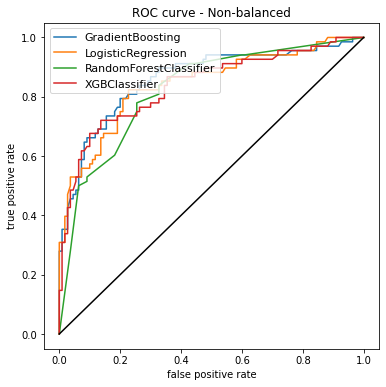

In [36]:
models_report, conf_matrix = run_models(X_train_scaled, y_train, X_test_scaled, y_test, model_type = 'Non-balanced')
models_report

In [37]:
from collections import Counter

X_train_res, y_train_res = SMOTE().fit_resample(X_train_scaled, y_train)
X_test_res, y_test_res = SMOTE().fit_resample(X_test_scaled, y_test)

print('Resampled training dataset shape %s' % Counter(y_train_res))
print('Resampled testing dataset shape %s' % Counter(y_test_res))

Resampled training dataset shape Counter({1: 439, 0: 439})
Resampled testing dataset shape Counter({0: 110, 1: 110})


computing GradientBoosting - Balanced 
computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 
computing XGBClassifier - Balanced 


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.621893,0.881488,0.846939,0.754545,0.798077,Balanced
1,LogisticRegression,0.592109,0.845744,0.777778,0.827273,0.801762,Balanced
2,RandomForestClassifier,0.551318,0.840826,0.819149,0.700000,0.754902,Balanced
3,XGBClassifier,0.621893,0.876157,0.846939,0.754545,0.798077,Balanced


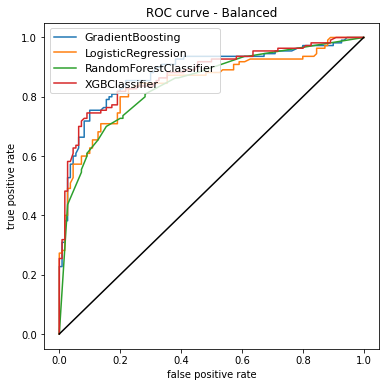

In [38]:
models_report_bal, conf_matrix_bal = run_models(X_train_res, y_train_res, X_test_res, y_test_res, model_type = 'Balanced')
models_report_bal

In [39]:
training_all = np.concatenate((X_train_res, X_test_res), axis=0)
testing_all = np.concatenate((y_train_res, y_test_res), axis=0)

In [40]:
# Get the best model
gbm=GradientBoostingClassifier()
gbm.fit(training_all, testing_all)

GradientBoostingClassifier()

In [41]:
# Deal with real test data
dt = pd.read_csv('/kaggle/input/titanic/test.csv')

In [42]:
round(dt.isnull().sum(axis=0)/len(dt),2)*100

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            21.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          78.0
Embarked        0.0
dtype: float64

In [43]:
# vectorize features
cat_cols = ['Sex','Embarked']

for c in cat_cols:
    dt[c] = pd.factorize(dt[c])[0]

In [44]:
dt['Age'].fillna(dt['Age'].median(), inplace=True)
dt['Age'].fillna(0, inplace = True)

In [45]:
dt['Fare'].fillna(dt['Fare'].median(), inplace=True)
dt['Fare'].fillna(0, inplace = True)

In [46]:
dt2 = dt.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1)

In [47]:
dt2_scaled = scaler.transform(dt2)
dt2_scaled.shape

(418, 7)

In [49]:
y_pred = gbm.predict(dt2_scaled)

In [50]:
col2 = pd.DataFrame(y_pred, columns = ['Survived'])

In [51]:
col1 = dt['PassengerId']

In [52]:
result = pd.concat([col1, col2], join = 'outer', axis = 1)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [54]:
result.to_csv('submission_v2.csv',index=False)